In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lob_data_utils import lob
from lob_data_utils.roc_results import results_10000 as results

In [2]:
df_roc = pd.DataFrame()
df_roc['stock'] = results.keys()
df_roc['roc_area'] = results.values()

df_roc = df_roc.sort_values(by='roc_area', ascending=False)

dfs = {}
dfs_test = {}
dfs_cv = {}
stocks = ['11867', '9063']

for s in stocks:
    d, d_cv, d_test = lob.load_prepared_data(
        s, cv=True, data_dir='../data/prepared/', length=10000)
    dfs[s] = d
    dfs_cv[s] = d_cv
    dfs_test[s] = d_test

Len of data for  11867 is 14269
Training set length for 11867: 6000
Testing set length for 11867: 2000
Cross-validation set length for 11867: 2000
Len of data for  9063 is 16533
Training set length for 9063: 6000
Testing set length for 9063: 2000
Cross-validation set length for 9063: 2000


In [21]:
df_roc = pd.DataFrame()
df_roc['stock'] = [s for s in results.keys() if s in stocks]
df_roc['roc_area'] = [results[s] for s in results.keys() if s in stocks]
df_roc = df_roc.sort_values(by='roc_area', ascending=False)
df_roc.head()

,stock,roc_area
94,2028,0.618053
26,12098,0.612709
64,12552,0.612281
16,1221,0.612020
70,3459,0.609925


In [22]:
df_summary = pd.DataFrame(index=stocks)
sum_sell_ask_mean = []
sum_buy_bid_mean = []
max_trade_price = []
min_trade_price = []
bid_ask_spread = []
bid_len = []
ask_len = []

from scipy.stats import pearsonr
for s in stocks:
    sum_sell_ask_mean.append(dfs[s]['sum_sell_ask'].mean())
    sum_buy_bid_mean.append(dfs[s]['sum_buy_bid'].mean())
    max_trade_price.append(max( dfs[s]['bid_price'].max(), dfs[s]['ask_price'].max()))
    min_trade_price.append(max( dfs[s]['bid_price'].min(), dfs[s]['ask_price'].min()))
    bid_ask_spread.append((dfs[s]['ask_price'] - dfs[s]['bid_price']).mean())
    max_len_bid = 0
    max_len_ask = 0
    for i, row in dfs[s].iterrows():
        if len(row['bid']) > max_len_bid:
            max_len_bid = len(row['bid'])
        if len(row['ask']) > max_len_ask:
            max_len_ask = len(row['ask'])

    bid_len.append(max_len_bid)
    ask_len.append(max_len_ask)
df_summary['roc_area'] = df_roc['roc_area'].values
df_summary['sum_sell_ask_mean'] = sum_sell_ask_mean
df_summary['sum_buy_bid_mean'] = sum_buy_bid_mean
df_summary['diff_mean_bid_ask'] = df_summary['sum_sell_ask_mean'] - df_summary['sum_buy_bid_mean']
df_summary['max_trade_price'] = max_trade_price
df_summary['min_trade_price'] = min_trade_price
df_summary['diff_trade_price'] = df_summary['max_trade_price'] - df_summary['min_trade_price']
df_summary['bid_ask_spread'] = bid_ask_spread
df_summary['len_ask'] = ask_len
df_summary['len_bid'] = bid_len

df_summary.sort_values(by='bid_ask_spread')[df_summary['roc_area'] >= 0.58].head()


,roc_area,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid
2028,0.618053,37033.623242,38876.612895,-1842.989652,130.3,116.7,13.6,0.142001,0.029846,6.693353e-02,1138,1002
2890,0.588719,16750.638548,15403.593850,1347.044698,202.5,173.2,29.3,0.153151,0.085788,3.385574e-11,915,886
1956,0.580344,7440.167167,8133.749667,-693.582500,306.4,273.4,33.0,0.153583,0.114895,4.358453e-19,1040,846
3035,0.584046,6137.580500,5560.049667,577.530833,262.0,235.9,26.1,0.194967,0.059406,4.131468e-06,810,717
12552,0.612281,1541.183576,1520.387590,20.795986,512.0,473.8,38.2,0.255331,0.005403,6.905735e-01,669,652


In [25]:
df_summary.head()

,roc_area,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,pearson_corr1,pearson_corr2,len_ask,len_bid
10166,0.561092,800.550333,860.828500,-60.278167,3454.5,2968.5,486.0,1.195917,0.009147,4.786802e-01,1222,1446
10470,0.596423,951.811200,1089.178571,-137.367372,2510.0,2208.0,302.0,1.712552,0.040252,2.231324e-03,737,717
10484,0.549233,2717.582500,2810.821333,-93.238833,358.4,316.2,42.2,0.288167,0.093252,4.570038e-13,740,682
10508,0.572313,3710.705500,3863.016500,-152.311000,378.8,341.3,37.5,0.241700,-0.061503,1.864793e-06,719,817
10795,0.604663,2345.858763,2034.958852,310.899911,1644.0,1440.0,204.0,1.571397,-0.029759,4.601041e-02,597,598


[]

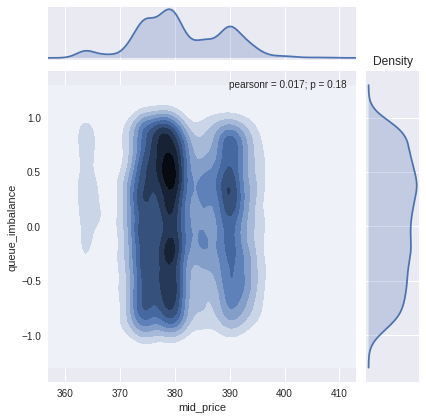

In [37]:
s = stocks[0]
sns.jointplot(x="mid_price", y="queue_imbalance", data=dfs[s].loc[:, ['mid_price', 'queue_imbalance']], kind="kde")
plt.title('Density')
plt.plot()

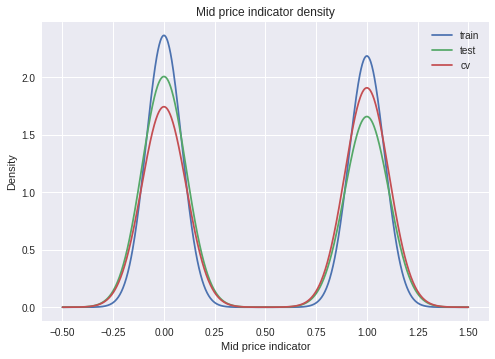

In [38]:
s = stocks[0]
dfs[s]['mid_price_indicator'].plot('kde', label='train')
dfs_test[s]['mid_price_indicator'].plot('kde', label='test')
dfs_cv[s]['mid_price_indicator'].plot('kde', label='cv')
plt.legend()
plt.xlabel('Mid price indicator')
plt.title('Mid price indicator density')

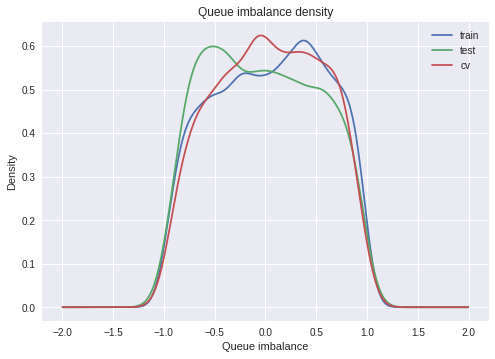

In [39]:
s = stocks[0]

dfs[s]['queue_imbalance'].plot('kde', label='train')
dfs_test[s]['queue_imbalance'].plot('kde', label='test')
dfs_cv[s]['queue_imbalance'].plot('kde', label='cv')
plt.legend()
plt.xlabel('Queue imbalance')
plt.title('Queue imbalance density')

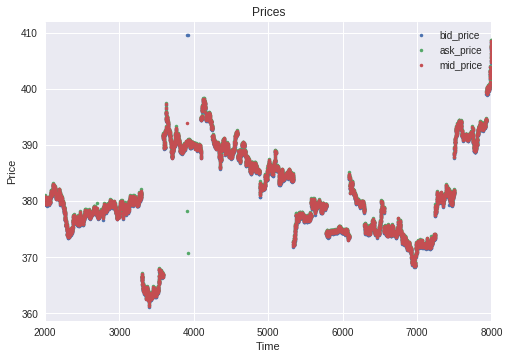

In [40]:
dfs[s][['bid_price', 'ask_price', 'mid_price']].plot(style='.')
plt.legend()
plt.title('Prices')
plt.xlabel('Time')
plt.ylabel('Price')

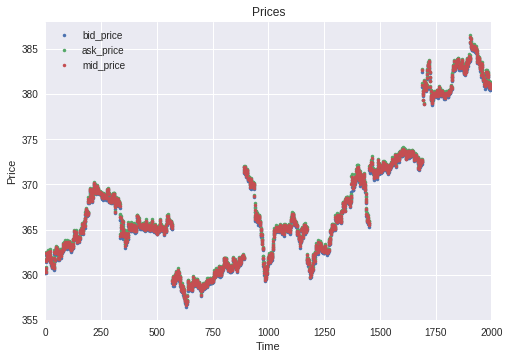

In [41]:
dfs_test[s][['bid_price', 'ask_price', 'mid_price']].plot(style='.')
plt.legend()
plt.title('Prices')
plt.xlabel('Time')
plt.ylabel('Price')

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
s = stocks[0]
X = dfs[s]['queue_imbalance'].reshape(-1, 1)
kde = KernelDensity(kernel='gaussian').fit(X)
log_dens = kde.score_samples(X)
print(log_dens)


[-1.0563806  -1.05757224 -1.11517671 ..., -1.10472527 -1.24266766
 -1.05447837]


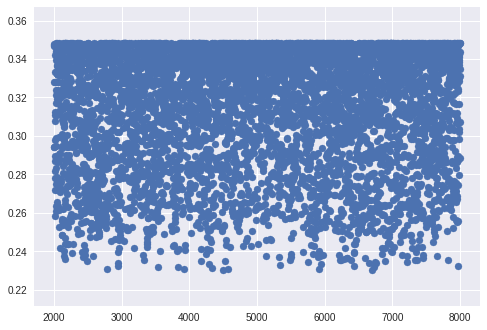

In [43]:
plt.scatter(dfs[s].index, np.exp(log_dens))

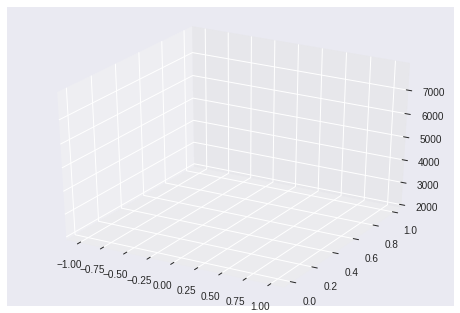

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =  dfs[s]['queue_imbalance'].values
y = dfs[s]['mid_price_indicator'].values

#x, y = np.meshgrid(np.exp(log_dens), dfs[s]['queue_imbalance'].values)

ax.plot_surface(x, y, dfs[s].index)
